# k-Nearest Neighbors (kNN)

kNN es considerado uno de los algortimos más sencillos de machine learning ya que para este solo se necesita entrenar el conjunto de datos. 

### ¿Cómo funciona?

$ P(y=j|X=x) = \frac{1}{K} \sum_{i \epsilon A} I(y^{i}=j)$

Como su nombre lo dice para predecir la "identidad" de nuestro valor a predecir se tomarán en cuenta los vecinos, para esto se colocará nuestro nuevo punto dentro del conjunto de datos de entranmiento, se creará una vencidad y dependiendo de la la clasificación de los puntos encerrados en este, por mayoría, se eligirá la nueva etiqueta. Las distancias pueden ser medidas con diferentes métricas pero la más común es la métrica euclideana.

$ d((x_{1},y_{1}),(x_{2},y_{2})) = \sqrt{(x_{2}-x_{1})^{2} +(y_{2}-y_{1})^{2}}$ 

La métrica es útil porque nos da a entender la geometría de nuestra vecindad.

Se elegirá la clasificación de nuestro punto por 

$ P(y=j|X=x) = \frac{1}{K} \sum_{i \epsilon A} I(y^{i}=j)$

En este caso K representa nuestro número total de vecindariose  $I$ la función indicadora.

Basicamente lo que hace este algoritmo es comparar a nuestro punto con los puntos más cercanos. En su versión más sencilla solo se compara con el primer punto más cercano 


In [7]:
#Importamos datos
import pandas as pd #leer datos
import numpy as np  #Comptacion cientifica
import mglearn      #Conjuntos de datos
import warnings     #Ignorar advertencias
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


### Version más sencilla kNN

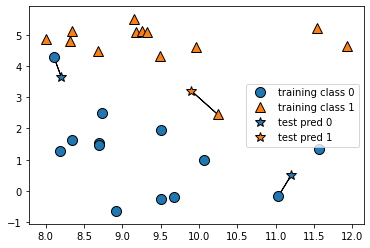

In [8]:
#Version más sencilla kNN

mglearn.plots.plot_knn_classification(n_neighbors=1)

En este caso se se agregaron 3 nuevos puntos para predecir su naturaleza y se marca su vecino más cercano.

En lugar de solo considerar al vecino más cercano también podemos tomar un número de vecinos arbitrarios k. Cuando se tienen más de un vecino se usa un sistema de votación como se mostró anteriormente. Para ilutrar un poco más observemos la gráfica anterior tenemos dos clases, 0 y 1, imaginando que se tomen 5 vecinos para un punto si 2 de estos son 0 y 3 corresponden a la clase 1 se designará a dicho punto como un 1.

Para ilustrar mejor este ejemplo observemos la siguiente figura y observemos el segundo punto a predecir.


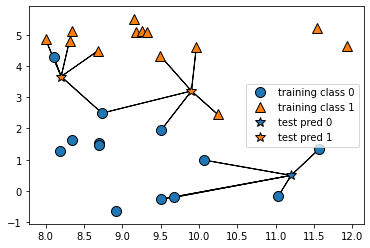

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

Observemos que en este caso nuestro primer punto cambia de clase al tomar más vecinos. 

Ahora apliquemos dicho algoritmo con un ejemplo.

In [9]:
#Dividir en conjunto de entrenameinto y prueba

from sklearn.model_selection import train_test_split 

#Importamos datos

x, y = mglearn.datasets.make_forge()

#dividimos en entrenamiento y prueba

x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, random_state=0)

In [10]:
#Importamos knn de scikitlearn

from sklearn.neighbors import KNeighborsClassifier

#Creamos nuestro algoritmo para que tome 3 vecinos

knn = KNeighborsClassifier(n_neighbors=3)

#Aplicamos algoritmo

knn.fit(x_entrenamiento, y_entrenamiento);


In [11]:
#Comparemos resultados izquierda predecido, deracha esperado
knn.predict(x_prueba), y_prueba


(array([1, 0, 1, 0, 1, 0, 0]), array([1, 0, 1, 0, 1, 1, 0]))

In [12]:
#Precisión de modelo

knn.score(x_prueba, y_prueba )

0.8571428571428571

## 2 dimensiones

De los ejemplos anteriores podemos darnos cuentas que nos encontramos en el plano xy por lo que tenemos solamente dos dimensiones. Como es de esperarse cada clase parece dominar una región del plano, por lo que podemos definir una frotera a dicha frontera se le conoce "frontera de decisión", esta dependera del número de vecinos que se tomen, como se muestra a continuación.

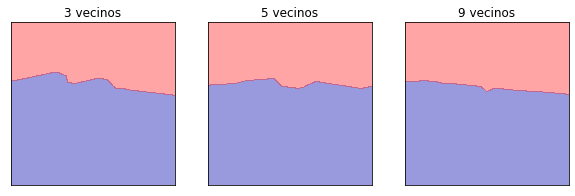

In [26]:
#Creamos figura
fig, axes = plt.subplots(1,3,figsize=(10,3))


for i, ax in zip([3,5,9],axes):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_entrenamiento, y_entrenamiento)
    mglearn.plots.plot_2d_separator(knn, x_entrenamiento, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.set_title(str(i)+" "+"vecinos")
    

Aquí si el color azul representa a la clase 0 y el rojo representa a la clase 1 por lo que la clase predicha para un nuevo punto dependerá en que zona se encuentra. Comparemos la distribución de los datos con la frontera de decisión para 3 y 9 vecinos.

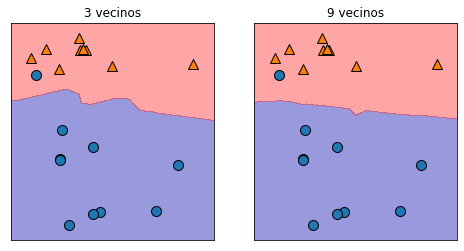

In [34]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

for i, ax in zip([3,9],axes):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_entrenamiento, y_entrenamiento)
    mglearn.plots.plot_2d_separator(knn, x_entrenamiento, fill=True, eps=0.5, ax=ax, alpha=.4)
    ax.set_title(str(i)+" "+"vecinos")
    mglearn.discrete_scatter(x_entrenamiento[:, 0], x_entrenamiento[:, 1], y_entrenamiento, ax=ax)   

De la primera figura podemos darnos cuenta que parece adaptarse al conjunto de entrenamiento muy bien. Esto no es buena práctica ya que queremos ser imparciales respecto a la toma de decisiones por lo que más datos y un número mayor de vecinos ayudara a realizar mejores predicciones.